In [1]:
import numpy as np
import random
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

Objetivo: Programar una regresión multivariada


1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano. 

- Realizar un diagrama 3D de los puntos generados aleatoriamente. 


In [5]:
# Plano y = 2.1*x_1 + 3.1*x_2
def y(x1, x2):
    return 0 + 2.1*x1 + 3.1*x2  #Th_0 = 0; Th_1 = 2.1; Th_2 = 3.1

<IPython.core.display.Javascript object>


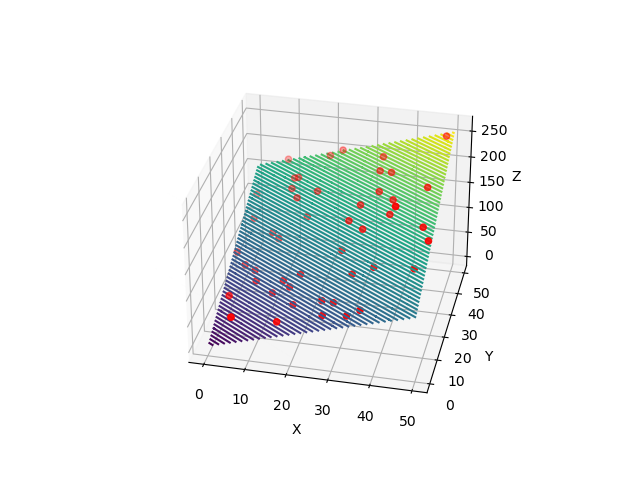

In [6]:

%matplotlib notebook

# Generando 50 datos de entrenamiento aleatorios para dos caracteristicas 
x1 = np.array([random.randint(1, 50) for num in range(50)])
x2 = np.array([random.randint(1, 50) for num in range(50)])
Y = y(x1, x2)

x = np.arange(0, 50, 0.1)
xx = np.arange(0, 50, 0.1)
X, YY = np.meshgrid(x, xx)
Z = y(X, YY)

# Ploting
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, YY, Z, 100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Puntos aleatorios 
ax.scatter(x1, x2, Y, color='red')
plt.show()

Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_2 = 3.1$ que mejor ajustar el plano, empleando cálculos vectorizados. 

2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.
3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.
4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):
 
  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

5. Aplicar el gradiente descendente: 
  - Encontrar el gradiente.
    $\nabla J$ = \Lambda X.T
  
  - Actualizar los nuevos parametros: 
    $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano. 



In [42]:
# Función para aplicar la regresion multivariada con parametro de entrada 
# m: numero de datos de entrenamiento
def multivariate_regresion(m):
    
    # Numero de parametros a optimizar en este caso se trata de un plano (n=3)
    n = 3
    
    # Generando dos conjuntos de caracteristicas aleatorias con m datos de entrenamiento
    x1 = np.array([random.randint(1, 50) for num in range(m)])
    x2 = np.array([random.randint(1, 50) for num in range(m)])
    # 
    Y = y(x1, x2)
    
    # Creando la matriz X de dimension nxm
    X = np.zeros((n, m))
    X[0] = np.ones(m)
    X[1] = x1
    X[2] = x2
    
    a = random.randint(0, 10)
    b = random.randint(0, 10)
    c = random.randint(0, 10)
    
    # Theta aleatorio (parametros inicalizados de manera aleatorio)
    Theta = np.array([[a],
                      [b],
                      [c]])
    
    h = Theta.T @ X - Y
    H = h ** 2 
    
    # Funcion de coste 
    J = H.mean()
    
    # Derivada de la funcion de coste 
    DJ = (1 / m) * X @ h.T
    
    # Learning rate
    alpha = 0.001
    
    # Aplicando el gradiente descendiente 
    Theta_new = Theta -  alpha * DJ  
    h_new = Theta_new.T @ X - Y
    H_new = h_new ** 2 
    
    # Nueva funcion de coste
    J_new = H_new.mean()
    DJ = (1 / m) * X @ h_new.T
    
    while J - J_new > 1e-14:
        
        Theta = Theta_new
        Theta_new = Theta - alpha * DJ
        
        h = Theta.T @ X - Y
        H = h ** 2 
        J = H.mean()
        
        h_new = Theta_new.T @ X - Y
        H_new = h_new ** 2 
        J_new = H_new.mean()
        
        DJ = (1 / m) * X @ h_new.T
    
    ## ======================================================================================= ##
    
    # Ecuacion normal, dim(X): m x (n+1)
    
    X = X.T
    A = X.T @ X
    AI = np.linalg.inv(A)
    Th = AI @ X.T @ Y
    
    return Theta_new
        

In [46]:
Th_0, Th_1, Th_2 = multivariate_regresion(100)

In [47]:
# Los parametros optimizados
Th_0, Th_1, Th_2 

(array([1.54231574e-05]), array([2.09999972]), array([3.09999978]))